# Assignment-1

441


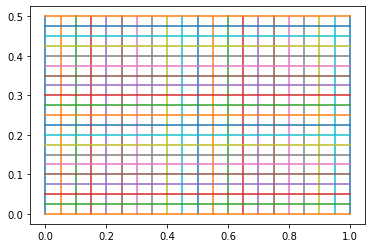

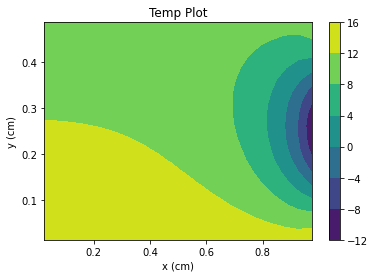

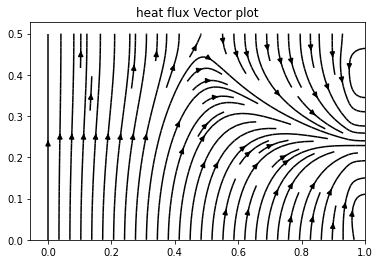

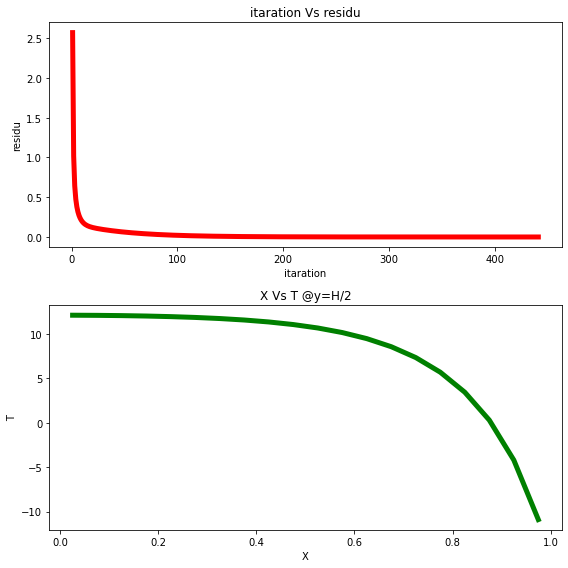

In [16]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d
Nx=20
Ny=20
L=1
H=0.5
#.......................streatching mesh...................................
dx=np.zeros(Nx)
dy=np.zeros(Ny)
dx[0]=L/Nx
dy[0]=H/Ny
for i in range(1,Nx):
    dx[i]=dx[i-1]*1
for i in range(1,Ny):
    dy[i]=dy[i-1]*1

cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i-1]
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i-1]
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Ny+1):
    cy[i]=(cy[i]/cy[-1])*H
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2

# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

#..............................................define problem...............
T3=10
T1=15
#.................................................................................
N=Nx*Ny
key=0
epc=10**(-5)
T_0=np.ones((Ny,Nx),dtype=np.float32)
T=np.ones((Ny,Nx),dtype=np.float32)
residu=[]
itaration=[]
count=0
j=0
while(key==0):
    for i in range(0,Ny):
        for j in range(0,Nx):
            if(i==0 and j==0): #1
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=0
                Ae=ke*dy[i]/(node_x[j+1]-node_x[j])
                An=kn*dx[j]/(node_y[i+1]-node_y[i])
                As=0
                Sp=-((2*ks*dx[j])/dy[i])+(-1.5*dx[j]*dy[i])/T_0[i][j]                      
                Su=((2*ks*dx[j])/dy[i])*T1                
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+An*T[i+1][j]+Su)/Ap
            elif(i==0 and j==Nx-1):#3
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i])+15*math.cos(2*math.pi*node_y[i]/H)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=0
                An=(kn*dx[j])/(node_y[i+1]-node_y[i])
                As=0
                Sp=-((2*ks*dx[j])/dy[i])-((2*ke*dy[i])/dx[j])+(-1.5*dx[j]*dy[i])/T_0[i][j]                           
                Su=((2*ks*dx[j])/dy[i])*T1+((2*ke*dy[i])/dx[j])*T2                          
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(i==Ny-1 and j==Nx-1):#9
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i])+15*math.cos(2*math.pi*node_y[i]/H)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=0
                An=0
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=-((2*kn*dx[j])/dy[i])-((2*ke*dy[i])/dx[j])+(-1.5*dx[j]*dy[i])/T_0[i][j]                    
                Su=+((2*kn*dx[j])/dy[i])*T3+((2*ke*dy[i])/dx[j])*T2             
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(i==Ny-1 and j==0):#7done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=0
                Ae=(ke*dy[i])/(node_x[j+1]-node_x[j])
                An=0
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=-((2*kn*dx[j])/dy[i])+(-1.5*dx[j]*dy[i])/T_0[i][j]                    
                Su=+((2*kn*dx[j])/dy[i])*T3
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+Su)/Ap
            elif(0<j<(Nx-1) and i==0):   #2done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=(ke*dy[i])/(node_x[j+1]-node_x[j])
                An=(kn*dx[j])/(node_y[i+1]-node_y[i])
                As=0
                Sp=-((2*ks*dx[j])/dy[i])+(-1.5*dx[j]*dy[i])/T_0[i][j]  
                Su=((2*ks*dx[j])/dy[i])*T1
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+Su)/Ap
            elif(j==Nx-1 and 0<i<(Ny-1)):#6done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i])+15*math.cos(2*math.pi*node_y[i]/H)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=0
                An=(kn*dx[j])/(node_y[i+1]-node_y[i])
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=-((2*ke*dy[i])/dx[j]) +(-1.5*dx[j]*dy[i])/T_0[i][j] 
                Su=((2*ke*dy[i])/dx[j])*T2 
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(An*T[i+1][j]+As*T[i-1][j]+Aw*T[i][j-1]+Su)/Ap
            elif(0<j<(Nx-1) and i==(Ny-1)):#8
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=(ke*dy[i])/(node_x[j+1]-node_x[j])
                An=0
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=-((2*kn*dx[j])/dy[i])+(-1.5*dx[j]*dy[i])/T_0[i][j]                    
                Su=+((2*kn*dx[j])/dy[i])*T3                
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+As*T[i-1][j]+Su)/Ap
            elif(0<i<(Ny-1) and j==0):#4
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=0
                Ae=(ke*dy[i])/(node_x[j+1]-node_x[j])
                An=(kn*dx[j])/(node_y[i+1]-node_y[i])
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=(-1.5*dx[j]*dy[i])/T_0[i][j]
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+As*T[i-1][j]+An*T[i+1][j]+Su)/Ap
            else:                            #(i!=0 and i!=(Ny-1) and j!=0 and j!=(Nx-1) ):#5
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                Aw=(kw*dy[i])/(node_x[j]-node_x[j-1])
                Ae=(ke*dy[i])/(node_x[j+1]-node_x[j])
                An=(kn*dx[j])/(node_y[i+1]-node_y[i])
                As=(ks*dx[j])/(node_y[i]-node_y[i-1])
                Sp=(-1.5*dx[j]*dy[i])/T_0[i][j]
                Su=0
                Ap=Aw+Ae+An+As-Sp
                T[i][j]=(Ae*T[i][j+1]+Aw*T[i][j-1]+An*T[i+1][j]+As*T[i-1][j]+Su)/Ap
    #.........................END OF FOR LOOP.........................................
    #.......................................Calculate Resu:........................................................
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        key=1
    T_0=copy.copy(T)
#..................................END OF WHILE LOOP.......................
#............................Flux Calculation................................... 
qx=np.zeros((Ny+1,Nx+1),dtype=np.float32)
qy=np.zeros((Ny+1,Nx+1),dtype=np.float32)
qR=np.zeros((Ny+1,Nx+1),dtype=np.float32)
for i in range(0,Ny):
        for j in range(0,Nx):
            if(i==0 and j==0): #1
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]=0
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i][j]=-2*ks*(T[i][j]-T1)/dy[i]
            elif(i==0 and j==Nx-1):#3
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i])+15*math.cos(2*math.pi*node_y[i]/H)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1])                        
                qx[i][j+1]=-2*ke*(T2-T[i][j-1])/dx[j]
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i-1][j]=-2*ks*(T[i][j]-T1)/dy[i]
            elif(i==Ny-1 and j==Nx-1):#9
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i-1])+15*math.cos(2*math.pi*node_y[i-1]/H)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1])                        
                qx[i][j+1]=-2*ke*(T2-T[i][j-1])/dx[j]
                qy[i+1][j]=-2*kn*(T3-T[i][j])/dy[i]
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])
            elif(i==Ny-1 and j==0):#7done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]  =0
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-2*kn*(T3-T[i][j])/dy[i]
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])
            elif(0<j<(Nx-1) and i==0):   #2done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1]) 
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i-1][j]=-2*ks*(T[i][j]-T1)/dy[i]
            elif(j==Nx-1and 0<i<(Ny-1)):#6done
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                T2=(-5*node_y[i])+15*math.cos(2*math.pi*node_y[i]/H)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1]) 
                qx[i][j+1]=-2*ke*(T2-T[i][j-1])/dx[j]
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])
            elif(0<j<(Nx-1) and i==(Ny-1)):#8
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1])
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-2*kn*(T3-T[i][j])/dy[i]
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])
            elif(0<i<(Ny-1) and j==0):#4
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]=0
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])
            else:                        
                ke=5*(1+(100*cx[j+1])/L)
                kw=5*(1+(100*cx[j])/L)
                kn=ks=5*(1+(100*node_x[j])/L)
                qx[i][j]  =-kw*(T[i][j]-T[i][j-1])/(node_x[j]-node_x[j-1])
                qx[i][j+1]=-ke*(T[i][j+1]-T[i][j])/(node_x[j+1]-node_x[j])
                qy[i+1][j]=-kn*(T[i+1][j]-T[i][j])/(node_y[i+1]-node_y[i])
                qy[i-1][j]=-ks*(T[i][j]-T[i-1][j])/(node_y[i]-node_y[i-1])

qR=np.sqrt(np.square(qx)+np.square(qy)) 
#.................................PRINT..........................................................................    
#print(residu)
#T_final=np.reshape(T, (Ny,Nx))
print(count)
# print(R)
# print(T)
#........................................ploting......................................................................

[m1,m2]=np.meshgrid(cx,cy) #to view mesh plot
plt.plot(m1,cy)
plt.plot(cx,np.transpose(m2))
plt.show()

[X,Y]=np.meshgrid(node_x,node_y) #to view temp plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()

xi = np.linspace(cx.min(), cx.max(), cx.size)
yi = np.linspace(cy.min(), cy.max(), cy.size)
[n1,n2]=np.meshgrid(xi,yi)
#fig = plt.figure(figsize =(8, 8))
plt.streamplot(n1,n2,qx,qy, density=1,linewidth=None, color='k')
#fig.colorbar(strm.lines)
plt.title('heat flux Vector plot')
plt.show()

# [k1,k2]=np.meshgrid(xi,yi) #to view mesh plot
# plt.plot(k1,yi)
# plt.plot(xi,np.transpose(k2))
# plt.show()

plt.subplots(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(itaration,residu, 'r', linewidth=5)
plt.title('itaration Vs residu')
plt.xlabel('itaration')
plt.ylabel('residu')

plt.subplot(2, 1, 2)
plt.plot(node_x,T[int(Ny/2)], 'g', linewidth=5)
plt.title('X Vs T @y=H/2')
plt.xlabel('X')
plt.ylabel('T')
plt.tight_layout()
plt.show()